# Comparative Analysis of Manchester City FC and Inter Milan for Champions League Final

This project involved analyzing and comparing the performance of Manchester City FC and Inter Milan for the Champions League Final. Data was collected manually from the UEFA website and entered into a spreadsheet. Key statistics such as match results, goals, possession percentage, passing accuracy, tackles, and disciplinary records were considered. An overall score was calculated using weighted metrics to determine the better team. The analysis concluded that Manchester City FC performed better than Inter Milan, based on factors like goals, possession, defensive capabilities, passing accuracy, and disciplinary actions. This project showcases the application of data analysis in sports decision-making.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Players = pd.read_csv(("C:\\Users\\Ayush Nagdawane\\Dropbox\\My PC (LAPTOP-8H8SAIRH)\\Downloads\\Untitled spreadsheet - Player Data.csv"))

## Data Wrangling

In [4]:
Players.head()

,Player Name,Club Name,Position,Matches Played,Minutes played,Goals,Total attempts,Tackles,Assists,Saves,Balls recovered,Clean sheets,Passing accuracy (%),Top speed (km/h),Distance covered (km),Yellow cards,Red Cards
0,Stefan Ortega,Man City,Goalkeeper,2,180,0,0,0,0,5,0,1,96%,23.6,10.77,0,0
1,Ederson,Man City,Goalkeeper,10,900,0,0,0,0,21,0,6,87.10%,28.2,47.8,1,0
2,Scott Carson,Man City,Goalkeeper,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,Kyle Walker,Man City,Defender,4,272,0,0,4,0,0,22,0,64.75%,35.21,29.89,0,0
4,Rúben Dias,Man City,Defender,11,958,1,0,12,0,0,59,0,95.64%,33,120.59,2,0


In [5]:
Team_Players_count = Players.groupby('Club Name')['Player Name'].count()
print (Team_Players_count)

Club Name
Inter Milan    28
Man City       23
Name: Player Name, dtype: int64


In [10]:
Players.dtypes

Player Name              object
Club Name                object
Position                 object
Matches Played           object
Minutes played           object
Goals                    object
Total attempts           object
Tackles                  object
Assists                  object
Saves                    object
Balls recovered          object
Clean sheets             object
Passing accuracy (%)     object
Top speed (km/h)         object
Distance covered (km)    object
Yellow cards             object
Red Cards                object
dtype: object

In [11]:
Players_df = Players[(Players != '-').all(axis=1)]
Players_df

,Player Name,Club Name,Position,Matches Played,Minutes played,Goals,Total attempts,Tackles,Assists,Saves,Balls recovered,Clean sheets,Passing accuracy (%),Top speed (km/h),Distance covered (km),Yellow cards,Red Cards
0,Stefan Ortega,Man City,Goalkeeper,2,180,0,0,0,0,5,0,1,96%,23.6,10.77,0,0
1,Ederson,Man City,Goalkeeper,10,900,0,0,0,0,21,0,6,87.10%,28.2,47.8,1,0
3,Kyle Walker,Man City,Defender,4,272,0,0,4,0,0,22,0,64.75%,35.21,29.89,0,0
4,Rúben Dias,Man City,Defender,11,958,1,0,12,0,0,59,0,95.64%,33,120.59,2,0
5,John Stones,Man City,Defender,7,603,1,0,2,0,0,26,0,92.86%,33.8,72.91,0,0
6,Nathan Aké,Man City,Defender,7,518,0,0,6,0,0,33,0,95.43%,31.5,59.93,1,0
7,Aymeric Laporte,Man City,Defender,4,292,0,0,2,0,0,13,0,92%,32.5,34.46,1,0
8,Sergio Gómez,Man City,Defender,5,307,0,0,3,0,0,14,0,92.60%,33,37.13,0,1
9,Manuel Akanji,Man City,Defender,10,855,1,0,16,0,0,53,0,93.20%,34.6,95.1,2,0
10,Rico Lewis *,Man City,Defender,2,118,1,0,2,0,0,4,0,93%,32.4,13.8,0,0


In [12]:
Numeric_Columns = ['Matches Played', 'Minutes played', 'Goals', 'Total attempts', 'Tackles', 'Assists', 'Saves',
                   'Balls recovered', 'Clean sheets', 'Top speed (km/h)',
                   'Distance covered (km)', 'Yellow cards', 'Red Cards']
Players_df[Numeric_Columns] = Players_df[Numeric_Columns].apply(pd.to_numeric)

Players_df.dtypes

C:\Users\Ayush Nagdawane\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Player Name               object
Club Name                 object
Position                  object
Matches Played             int64
Minutes played             int64
Goals                      int64
Total attempts             int64
Tackles                    int64
Assists                    int64
Saves                      int64
Balls recovered            int64
Clean sheets               int64
Passing accuracy (%)      object
Top speed (km/h)         float64
Distance covered (km)    float64
Yellow cards               int64
Red Cards                  int64
dtype: object

In [13]:
Players_df['Passing accuracy (%)'] = Players_df['Passing accuracy (%)'].astype(str)

<ipython-input-13-1746b64d3adb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Players_df['Passing accuracy (%)'] = Players_df['Passing accuracy (%)'].astype(str)


In [14]:
Players_df['Passing accuracy (%)'] = Players_df['Passing accuracy (%)'].str.rstrip('%')
Players_df['Passing accuracy (%)'] = pd.to_numeric(Players_df['Passing accuracy (%)'])

<ipython-input-14-ba08cee958e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Players_df['Passing accuracy (%)'] = Players_df['Passing accuracy (%)'].str.rstrip('%')
<ipython-input-14-ba08cee958e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Players_df['Passing accuracy (%)'] = pd.to_numeric(Players_df['Passing accuracy (%)'])


In [15]:
Players_df.dtypes

Player Name               object
Club Name                 object
Position                  object
Matches Played             int64
Minutes played             int64
Goals                      int64
Total attempts             int64
Tackles                    int64
Assists                    int64
Saves                      int64
Balls recovered            int64
Clean sheets               int64
Passing accuracy (%)     float64
Top speed (km/h)         float64
Distance covered (km)    float64
Yellow cards               int64
Red Cards                  int64
dtype: object

In [42]:
Players_df['Passing accuracy (%)'] = Players_df['Passing accuracy (%)'] / 100.0

<ipython-input-42-019bfd40a0f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Players_df['Passing accuracy (%)'] = Players_df['Passing accuracy (%)'] / 100.0


## Data Manipulation

In [16]:
Players_df

,Player Name,Club Name,Position,Matches Played,Minutes played,Goals,Total attempts,Tackles,Assists,Saves,Balls recovered,Clean sheets,Passing accuracy (%),Top speed (km/h),Distance covered (km),Yellow cards,Red Cards
0,Stefan Ortega,Man City,Goalkeeper,2,180,0,0,0,0,5,0,1,96.00,23.60,10.77,0,0
1,Ederson,Man City,Goalkeeper,10,900,0,0,0,0,21,0,6,87.10,28.20,47.80,1,0
3,Kyle Walker,Man City,Defender,4,272,0,0,4,0,0,22,0,64.75,35.21,29.89,0,0
4,Rúben Dias,Man City,Defender,11,958,1,0,12,0,0,59,0,95.64,33.00,120.59,2,0
5,John Stones,Man City,Defender,7,603,1,0,2,0,0,26,0,92.86,33.80,72.91,0,0
6,Nathan Aké,Man City,Defender,7,518,0,0,6,0,0,33,0,95.43,31.50,59.93,1,0
7,Aymeric Laporte,Man City,Defender,4,292,0,0,2,0,0,13,0,92.00,32.50,34.46,1,0
8,Sergio Gómez,Man City,Defender,5,307,0,0,3,0,0,14,0,92.60,33.00,37.13,0,1
9,Manuel Akanji,Man City,Defender,10,855,1,0,16,0,0,53,0,93.20,34.60,95.10,2,0
10,Rico Lewis *,Man City,Defender,2,118,1,0,2,0,0,4,0,93.00,32.40,13.80,0,0


In [17]:
Team_Players_countnew = Players_df.groupby('Club Name')['Player Name'].count()
print (Team_Players_countnew)

Club Name
Inter Milan    22
Man City       21
Name: Player Name, dtype: int64


#### Since Both the Team are unequal players we will find out the average

In [44]:
Inter_Milan_players = Players_df[Players_df['Club Name'] == 'Inter Milan']
Man_City_players = Players_df[Players_df['Club Name'] == 'Man City']

In [45]:
Inter_Milan_players

,Player Name,Club Name,Position,Matches Played,Minutes played,Goals,Total attempts,Tackles,Assists,Saves,Balls recovered,Clean sheets,Passing accuracy (%),Top speed (km/h),Distance covered (km),Yellow cards,Red Cards
25,André Onana,Inter Milan,Goalkeeper,12,1080,0,0,0,0,45,0,8,0.8034,28.70,53.66,1,0
27,Denzel Dumfries,Inter Milan,Defender,11,810,1,0,10,0,0,19,0,0.6864,34.71,102.57,0,0
28,Stefan de Vrij,Inter Milan,Defender,7,298,0,0,6,0,0,11,0,0.7672,31.00,35.55,1,0
29,Raoul Bellanova,Inter Milan,Defender,2,104,0,0,2,0,0,5,0,0.7250,35.50,14.06,0,0
30,Francesco Acerbi,Inter Milan,Defender,11,829,0,0,12,0,0,54,0,0.8100,31.40,98.03,1,0
31,Federico Dimarco,Inter Milan,Defender,10,646,0,0,5,0,0,28,0,0.7491,33.40,79.73,2,0
32,Danilo D'Ambrosio,Inter Milan,Defender,5,150,0,0,3,0,0,12,0,0.7080,30.60,17.93,0,0
33,Matteo Darmian,Inter Milan,Defender,10,738,0,0,16,0,0,40,0,0.8180,32.90,90.46,1,0
34,Milan Škriniar,Inter Milan,Defender,8,536,0,0,8,0,0,22,0,0.8738,31.20,62.20,0,0
37,Alessandro Bastoni,Inter Milan,Defender,11,913,0,0,19,0,0,44,0,0.8610,33.90,104.05,2,0


In [46]:
Man_City_players

,Player Name,Club Name,Position,Matches Played,Minutes played,Goals,Total attempts,Tackles,Assists,Saves,Balls recovered,Clean sheets,Passing accuracy (%),Top speed (km/h),Distance covered (km),Yellow cards,Red Cards
0,Stefan Ortega,Man City,Goalkeeper,2,180,0,0,0,0,5,0,1,0.9600,23.60,10.77,0,0
1,Ederson,Man City,Goalkeeper,10,900,0,0,0,0,21,0,6,0.8710,28.20,47.80,1,0
3,Kyle Walker,Man City,Defender,4,272,0,0,4,0,0,22,0,0.6475,35.21,29.89,0,0
4,Rúben Dias,Man City,Defender,11,958,1,0,12,0,0,59,0,0.9564,33.00,120.59,2,0
5,John Stones,Man City,Defender,7,603,1,0,2,0,0,26,0,0.9286,33.80,72.91,0,0
6,Nathan Aké,Man City,Defender,7,518,0,0,6,0,0,33,0,0.9543,31.50,59.93,1,0
7,Aymeric Laporte,Man City,Defender,4,292,0,0,2,0,0,13,0,0.9200,32.50,34.46,1,0
8,Sergio Gómez,Man City,Defender,5,307,0,0,3,0,0,14,0,0.9260,33.00,37.13,0,1
9,Manuel Akanji,Man City,Defender,10,855,1,0,16,0,0,53,0,0.9320,34.60,95.10,2,0
10,Rico Lewis *,Man City,Defender,2,118,1,0,2,0,0,4,0,0.9300,32.40,13.80,0,0


In [72]:
Average_Minutes_Per_Player_in_Man_City = Man_City_players.groupby('Club Name')['Minutes played'].mean()
Average_Minutes_Per_Player_in_Inter_Milan = Inter_Milan_players.groupby('Club Name')['Minutes played'].mean()

print(Average_Minutes_Per_Player_in_Man_City)
print(Average_Minutes_Per_Player_in_Inter_Milan)

Club Name
Man City    542.809524
Name: Minutes played, dtype: float64
Club Name
Inter Milan    540
Name: Minutes played, dtype: int64


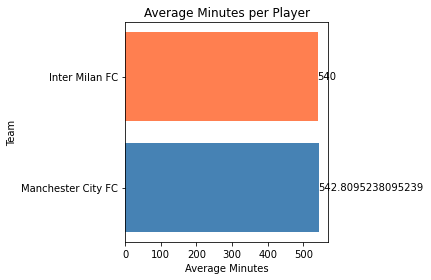

In [82]:
Teams = ['Manchester City FC', 'Inter Milan FC']
average_minutes = [Average_Minutes_Per_Player_in_Man_City[0], Average_Minutes_Per_Player_in_Inter_Milan[0]]


colors = ['steelblue', 'coral']

plt.barh(Teams, average_minutes, color=colors)
plt.title('Average Minutes per Player')
plt.xlabel('Average Minutes')
plt.ylabel('Team')
for i, v in enumerate(average_minutes):
    plt.text(v, i, str(v), color='black', va='center')
plt.tight_layout()
plt.show()

#### Man City Average Minutes Per Players is More than Inter Milan

In [33]:
Total_Goals_By_Man_City = Players_df[Players_df['Club Name'] == 'Man City']['Goals'].sum()
Total_Goals_By_Inter_Milan = Players_df[Players_df['Club Name'] == 'Inter Milan']['Goals'].sum()

In [35]:
print("Total Goals Score By Man City are -", Total_Goals_By_Man_City)
print("Total Goals Score By Inter Milan are -", Total_Goals_By_Inter_Milan)

Total Goals Score By Man City are - 30
Total Goals Score By Inter Milan are - 19


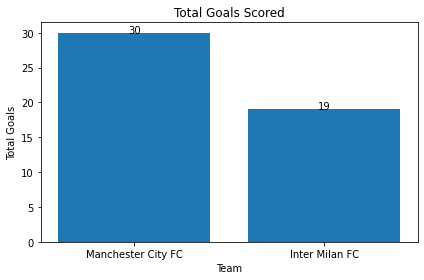

In [98]:
teams = ['Manchester City FC', 'Inter Milan FC']
total_goals = [Total_Goals_By_Man_City, Total_Goals_By_Inter_Milan]
colors = ['steelblue', 'coral']
plt.bar(teams, total_goals)
plt.title('Total Goals Scored')
plt.xlabel('Team')
plt.ylabel('Total Goals')
for i, v in enumerate(total_goals):
    plt.text(i, v, str(v), color='black', ha='center')
plt.tight_layout()
plt.show()

#### Man City Goals are More than Inter Milan

In [37]:
Average_Top_Speed_of_Man_City = Man_City_players.groupby('Club Name')['Top speed (km/h)'].mean()
Average_Top_Speed_of_Inter_Milan = Inter_Milan_players.groupby('Club Name')['Top speed (km/h)'].mean()

print("Average Top Speed of -",Average_Top_Speed_of_Man_City)
print("Average Top Speed of -",Average_Top_Speed_of_Inter_Milan)

Average Top Speed of - Club Name
Man City    31.868095
Name: Top speed (km/h), dtype: float64
Average Top Speed of - Club Name
Inter Milan    31.847273
Name: Top speed (km/h), dtype: float64


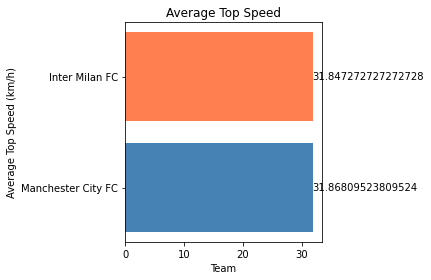

In [111]:
teams = ['Manchester City FC', 'Inter Milan FC']
average_top_speed = [Average_Top_Speed_of_Man_City[0], Average_Top_Speed_of_Inter_Milan[0]]  # Convert to list format
colors = ['steelblue', 'coral']
plt.barh(teams, average_top_speed, color=colors)
plt.title('Average Top Speed')
plt.xlabel('Team')
plt.ylabel('Average Top Speed (km/h)')

for i, v in enumerate(average_top_speed):
    plt.text(v, i, str(v), color='black', va='center')
plt.tight_layout()
plt.show()

#### Man City Average Top Speed Per Players is More than Inter Milan

In [52]:
Average_Passing_Accuracy_Man_City_players = Man_City_players.groupby('Club Name')['Passing accuracy (%)'].mean()
Average_Passing_Accuracy_Inter_Milan_players = Inter_Milan_players.groupby('Club Name')['Passing accuracy (%)'].mean()

print('Average Precentage of Passing Accuracy of ', Average_Passing_Accuracy_Man_City_players*100)
print('Average Precentage of Passing Accuracy of ', Average_Passing_Accuracy_Inter_Milan_players*100)

Average Precentage of Passing Accuracy of  Club Name
Man City    86.589524
Name: Passing accuracy (%), dtype: float64
Average Precentage of Passing Accuracy of  Club Name
Inter Milan    77.941364
Name: Passing accuracy (%), dtype: float64


In [63]:
Average_Precentage_of_Passing_Accuracy_Man_City = 86.58
Average_Precentage_of_Passing_Accuracy_Inter_Milan = 77.94

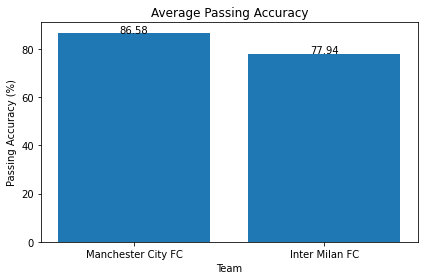

In [113]:
passing_accuracy = [Average_Precentage_of_Passing_Accuracy_Man_City, Average_Precentage_of_Passing_Accuracy_Inter_Milan]
plt.bar(teams, passing_accuracy)
plt.title('Average Passing Accuracy')
plt.xlabel('Team')
plt.ylabel('Passing Accuracy (%)')
for i, v in enumerate(passing_accuracy):
    plt.text(i, v, str(round(v, 2)), color='black', ha='center')
plt.tight_layout()
plt.show()

## Based on this Data - Player Wise Manchester City FC has More Points Compare to Inter Milan FC

In [86]:
Teams = pd.read_csv("C:\\Users\\Ayush Nagdawane\\Dropbox\\My PC (LAPTOP-8H8SAIRH)\\Downloads\\UEFA Champion League Finals Man City VS Inter Milan - Team Data Verical.csv")

In [87]:
Teams

,Team,Matches Played,Won,Drawn,Lost,Goals,Goals conceded,Possession (%),Balls recovered,Tackles won,Clean sheets,Saves,Distance covered (km),Yellow cards,Red cards
0,Manchester City FC,12,7,5,0,30,5,59.84,449,41,7,26,1397.70,20,1
1,Inter Milan FC,12,7,3,2,19,10,46.42,461,83,8,45,1410.45,24,1


In [88]:
Teams['Avg Passing Accuracy (%)'] = [Average_Precentage_of_Passing_Accuracy_Man_City, Average_Precentage_of_Passing_Accuracy_Inter_Milan]

In [89]:
Teams

,Team,Matches Played,Won,Drawn,Lost,Goals,Goals conceded,Possession (%),Balls recovered,Tackles won,Clean sheets,Saves,Distance covered (km),Yellow cards,Red cards,Avg Passing Accuracy (%)
0,Manchester City FC,12,7,5,0,30,5,59.84,449,41,7,26,1397.70,20,1,86.58
1,Inter Milan FC,12,7,3,2,19,10,46.42,461,83,8,45,1410.45,24,1,77.94


In [90]:
Weights = {
    'Won': 2,
    'Drawn': 1,
    'Lost': -1,
    'Goals': 2,
    'Goals_conceded': -1,
    'Possession(%)': 1,
    'Balls_recovered': 1,
    'Tackles_won': 1,
    'Clean_sheets': 2,
    'Saves': 1,
    'Distance_covered(km)': 1,
    'Yellow_cards': -0.5,
    'Red_cards': -1,
    'Avg Passing Accuracy (%)': 1
}

In [91]:
Teams['Overall Score'] = 0
for Column, Weight in Weights.items():
    if Column in Teams.columns:
        Teams['Overall Score'] += Teams[Column] * Weight

In [92]:
Team_Overall_Scores = Teams[['Team', 'Overall Score']]
print(Team_Overall_Scores)

                 Team  Overall Score
0  Manchester City FC         191.58
1      Inter Milan FC         175.94


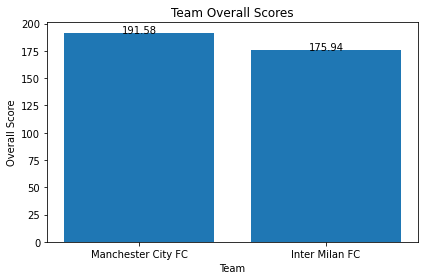

In [114]:
teamsgraph = Team_Overall_Scores['Team']
overall_scores = Team_Overall_Scores['Overall Score']
plt.bar(teamsgraph, overall_scores)
plt.title('Team Overall Scores')
plt.xlabel('Team')
plt.ylabel('Overall Score')
for i, v in enumerate(overall_scores):
    plt.text(i, v, str(round(v, 2)), color='black', ha='center')
plt.tight_layout()
plt.show()

## Overall Team Wise Manchester City FC Has More Overall Scores than Inter Milan FC

In [93]:
#-----------------------------------------------------------------------------------------------------------------------

## CONSIDERING THE TOTAL PLAYER WISE AND WHOLE TEAM WISE 

# MANCHESTER CITY FC IS BETTER TEAM COMPARE TO INTER MILAN FC